# ROC CURVES & AUC
## Receiver Operating Characteristic Curves & Area Under Curve

AUC is an alternative comprehensive metric to confusion matrices, and ROC graphs allow us to determine optimal precision-recall tradeoff balances specific to the problem we are looking to solve.

**Receiver Operator Characteristic curve (ROC curve)** illustrates the true positive rate (`Recal`) against the false positive rate of our classifier. Ratio of the true positive predictions compared to all values that are actually positive.
$$ \text{TPR} = \frac{\text{TP}}{\text{TP}+\text{FN}} $$
False positive rate is the ratio of the false positive predictions compared to all values that are actually negative. Mathematically, it's represented as:
$$ \text{FPR} = \frac{\text{FP}}{\text{FP}+\text{TN}}$$
When training a classifier, the best performing models will have an ROC curve that hugs the upper left corner of the graph. A classifier with 50-50 accuracy is deemed 'worthless'; this is no better than random guessing, as in the case of a coin flip.
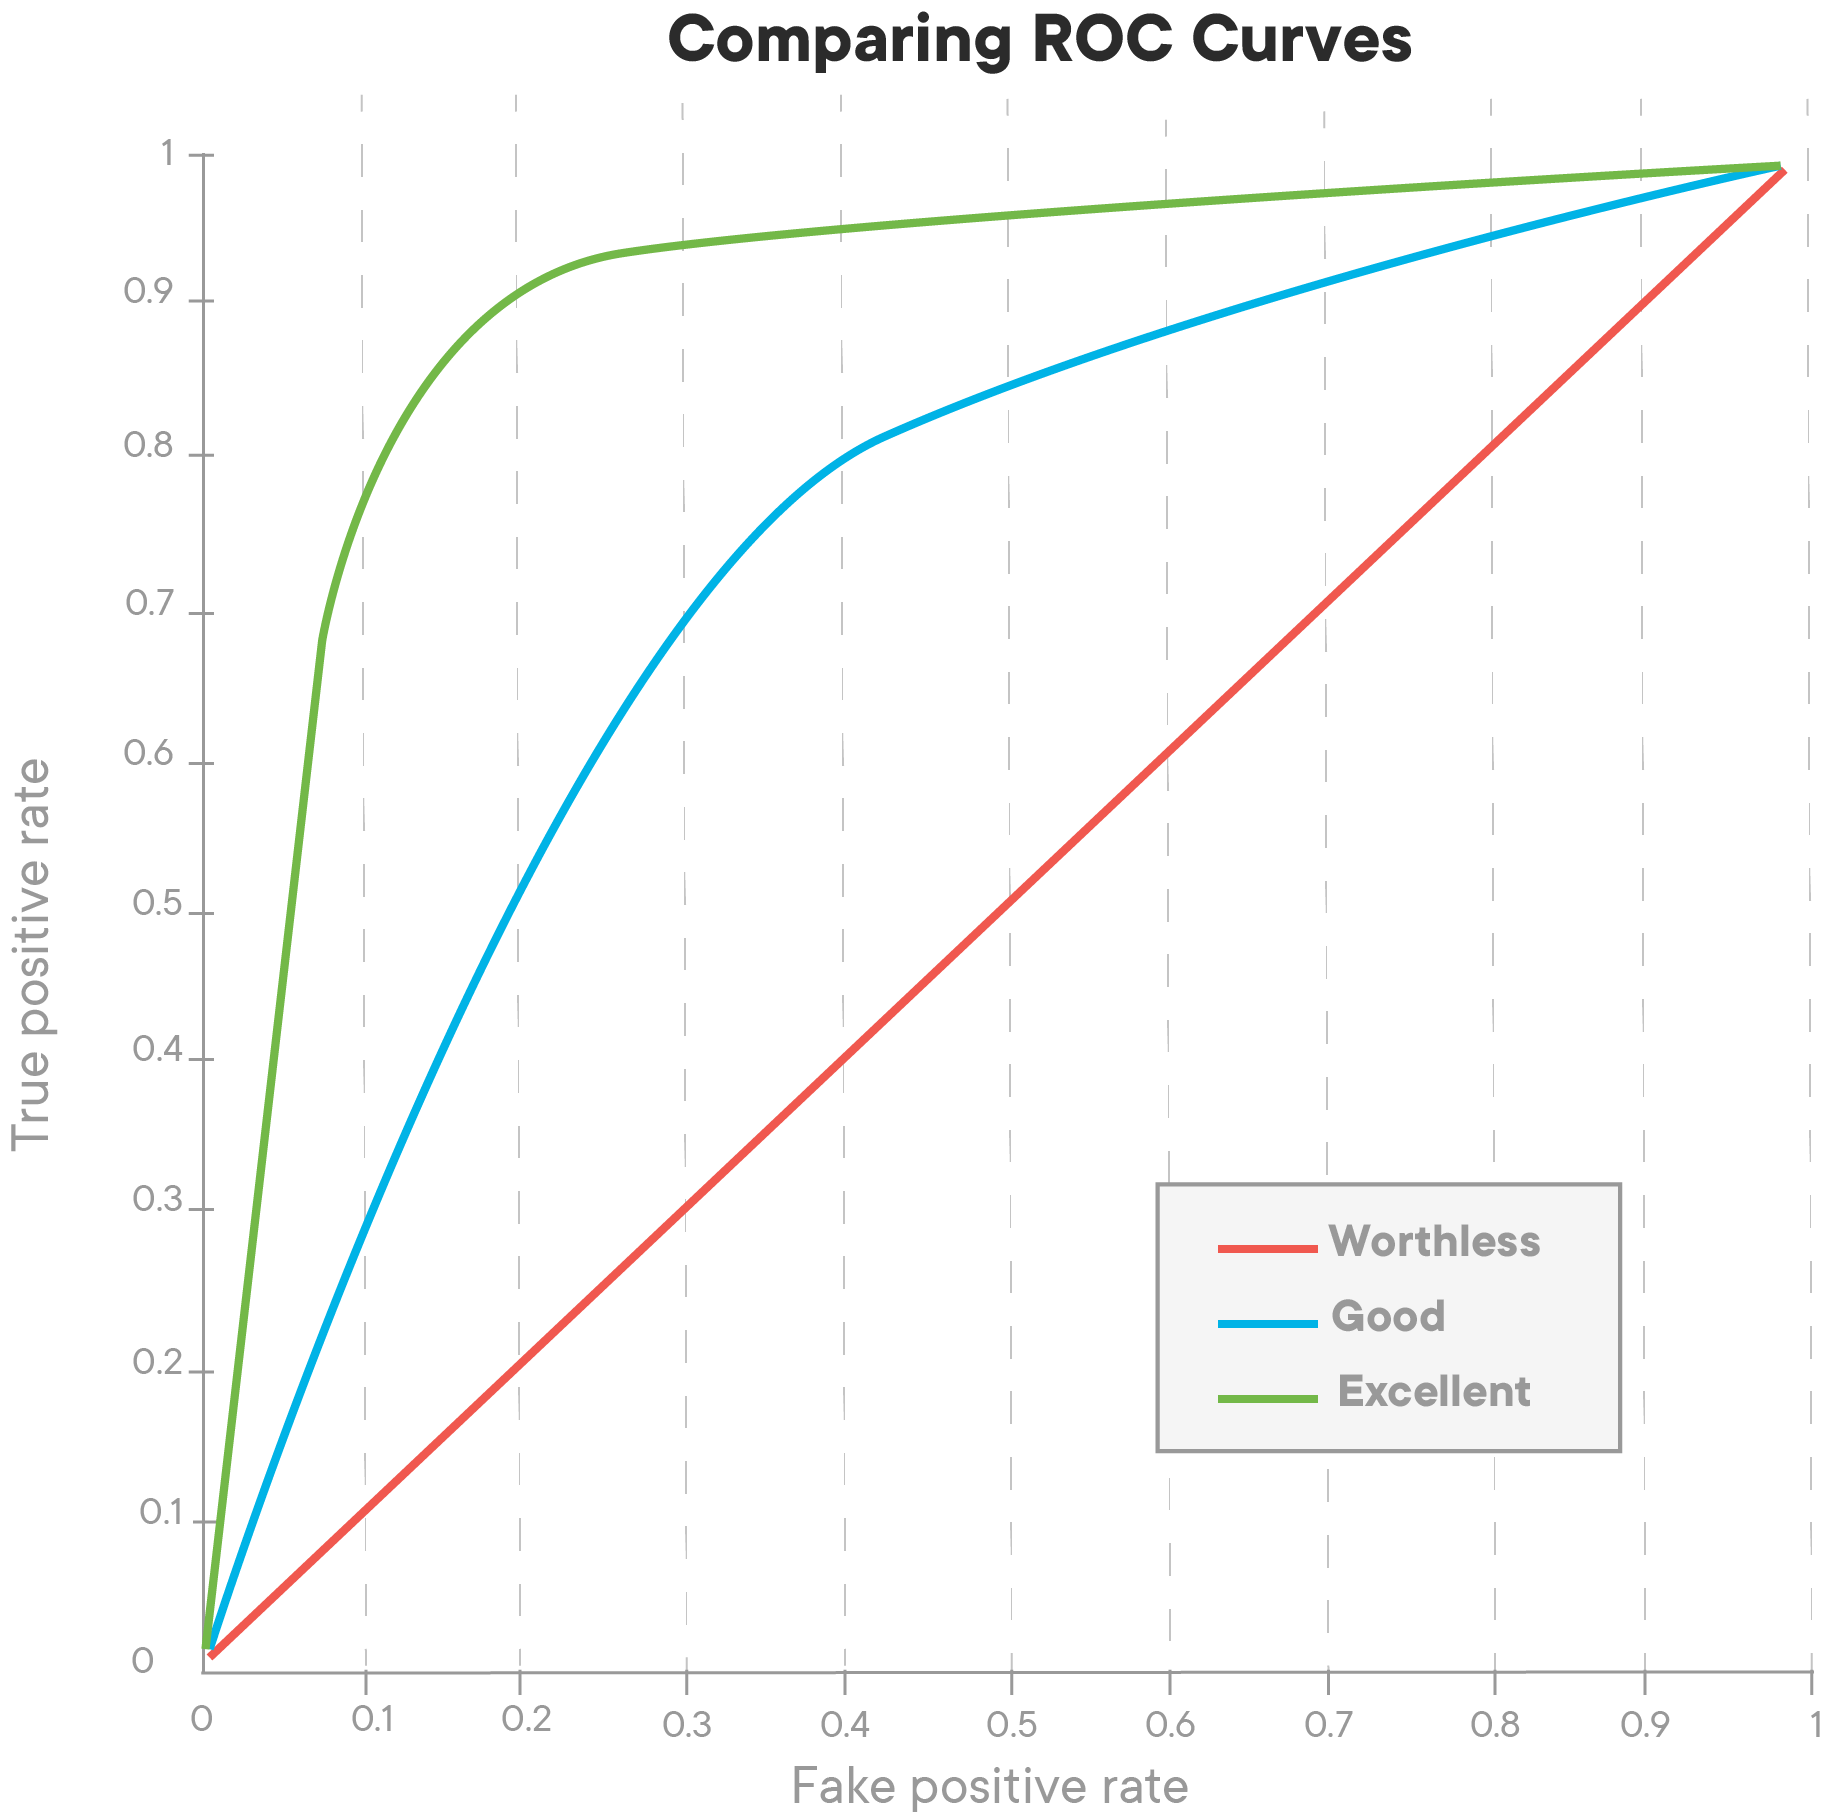
The ROC curve gives us a graph of the tradeoff between this false positive and true positive rate. The AUC, or area under the curve, gives us a singular metric to compare these. An AUC of 1 being a perfect classifier, and an AUC of 0.5 being that which has a precision of 50%.

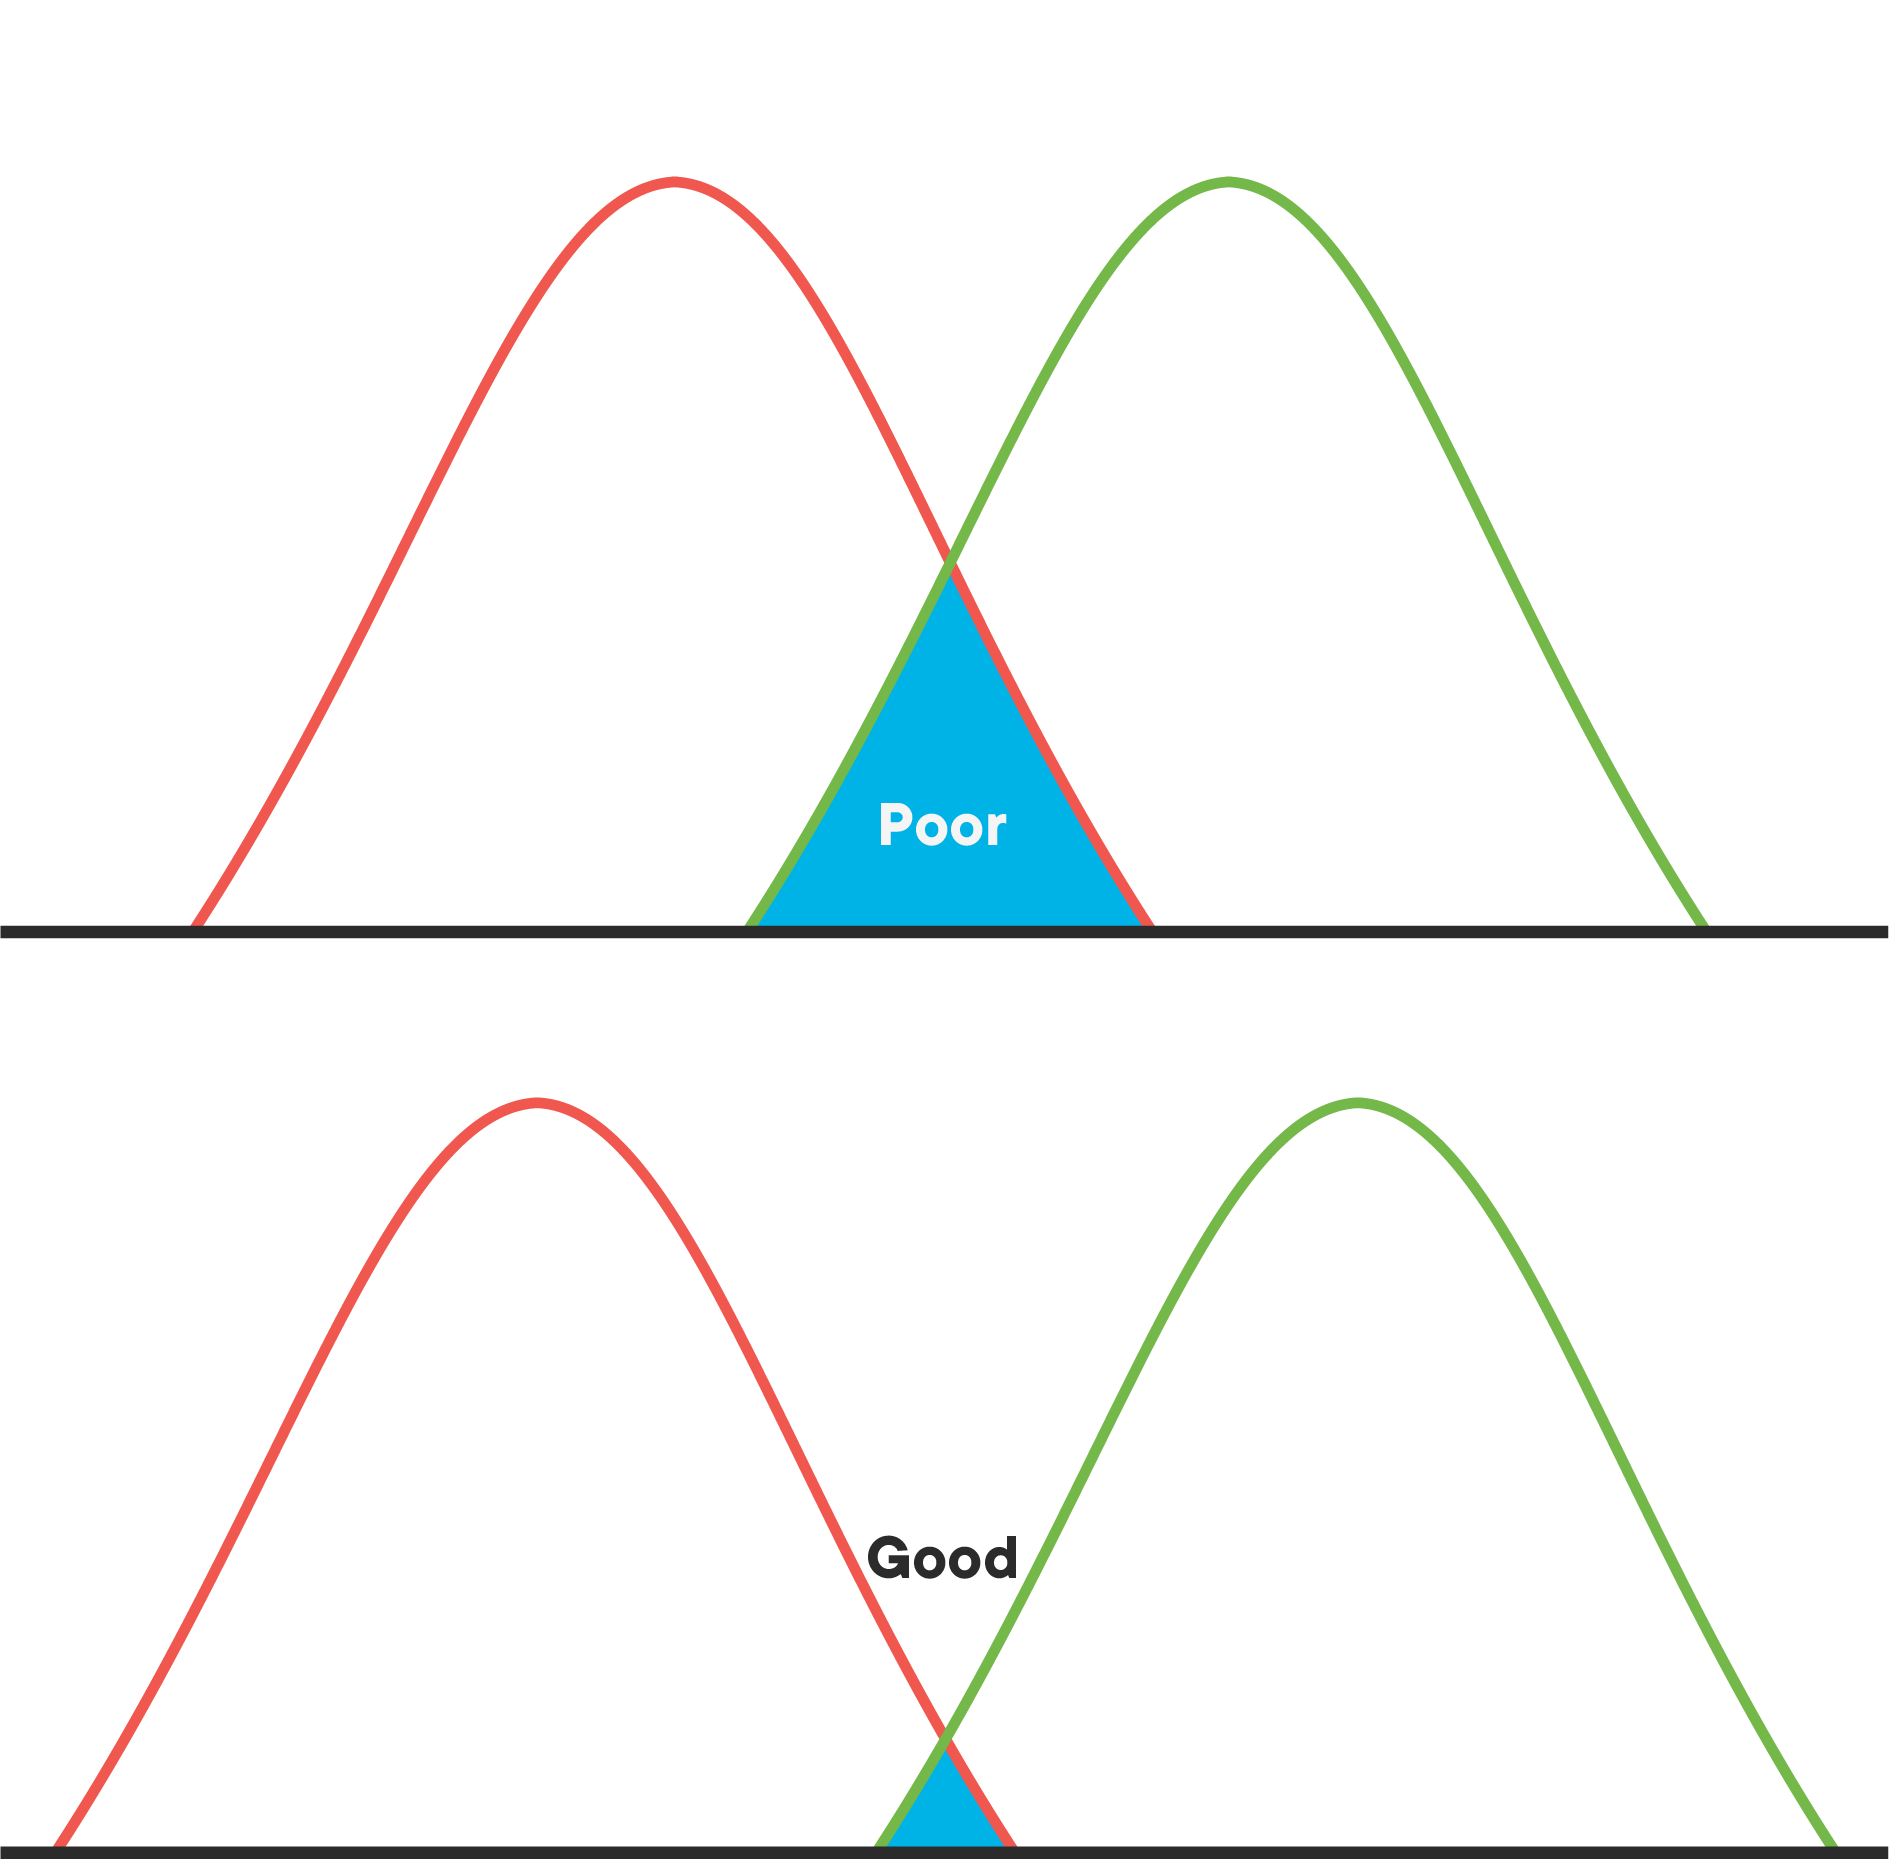

### Train a Classifier (Real Example: Heart Disease Dataset)

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
df = pd.read_csv('heart.csv')

# Define appropriate X and y
y = df['target']
X = df.drop(columns='target', axis=1)

# Normalize the Data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params

# Predict
y_hat_test = logreg.predict(X_test)

# Data preview
print("")
df.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [2]:
# Drawing the ROC Curve
from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [3]:
# Calculating AUC
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.8823114869626498


AUC: 0.8823114869626498


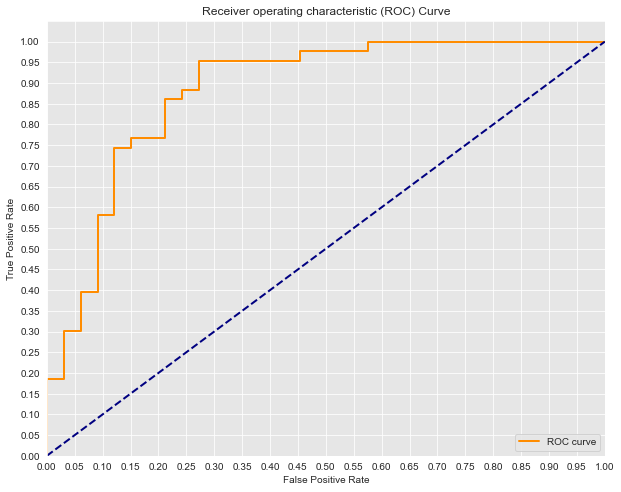

In [5]:
#Visualiztion

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

> Think about the scenario of this model: predicting heart disease. If you tune the current model to have an 82% True Positive Rate, (you've still missed 18% of those with heart disease), what is the False positive rate? (FRP @ 0.82 = 0.17)

> If you instead tune the model to have a 95.2% True Postive Rate, what will the False Postive Rate be? (FPR @ 0.95 = 0.22)

> **With such an important decision, such as detecting heart disease, we would hope for more accurate results. The True positive weight is the more important of the two in this scenario.**

>**That is, the true positive rate determines the percentage of patients with heart disease who are correctly identified and warned.**

>**The false positive rate is still very important, but it would be better to accidentally scare a few healthy patients and warn them of potentially having heart disease than having missed warnings.**

>**That said, the false positive rate becomes rather unacceptably high once the true positive rate exceeds .95.**

>**A .95 TPR indicates that out of 100 patients with heart disease we correctly warn 95 of them, but fail to warn 5.**

>**At the same time, this has a FPR of nearly .25 meaning that roughly one in four times we incorrectly warn a patient of heart disease when they are actually healthy.**

we investigated another evaluation metric for classification algorithms (including logistic regression). Namely, the **Receiver Operating Characteristic** curve (ROC) which graphs the *False Positive Rate* against the *True Positive Rate*. The overall accuracy of a classifier can thus be quantified by the AUC, the **Area Under the Curve**. Perfect classifiers would have an AUC score of 1.0 while an AUC of 0.5 is deemed trivial or worthless.

### Train a Classifier (Mushrooms Dataset)

In [6]:
import pandas as pd

# Load the data
df = pd.read_csv('mushrooms.csv')

# Data preview
print(df.head())
print('')
print(df.info())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

All columns are objects thus shall need to create dummy variables both both target & predictor variables proceed to split our data.

In [7]:
# Define y
y = pd.get_dummies(df['class'], drop_first=True)
y = y['p']

# Define X
X = df.drop(columns=['class'], axis=1)
X = pd.get_dummies(X, drop_first=True)

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Fitting base logistic regression model to training data & Make predictions using this model on test data

In [8]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model to training data
model_log = logreg.fit(X_train, y_train)

# Predict on test set
y_hat_test = logreg.predict(X_test)

In [9]:
# Calculating TPR & FPR

# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

Training AUC: 1.0


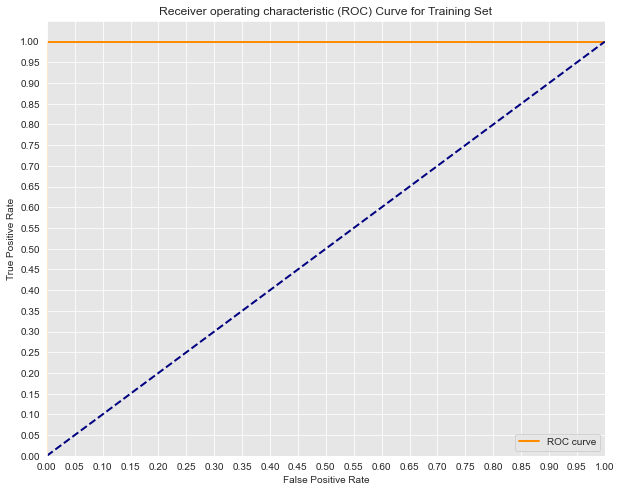

In [10]:
#Draw the ROC Curve

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

Test AUC: 1.0



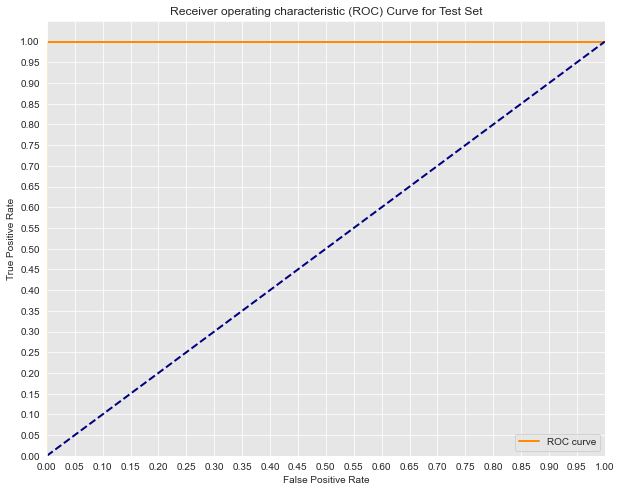

In [11]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('')
plt.show()

>Both have an AUC of 1.0, indicating their performance is perfect\
Note that this is an extreme rarity!\
Typically, if models perform this well it is too good to be true.

**We were able to compare the output of your own implementation of the logistic regression model with that of scikit-learn. However, that model did not include an intercept or any regularization. We will proceed to analyze the impact of these two tuning parameters using Hearts Disease Dataset**

In [12]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [13]:
# Import the data

df = pd.read_csv('heart.csv')

# Print the first five rows of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [14]:
#Splitting dataset

# Define X and y
y = df['target']
X = df.drop(columns=['target'], axis=1)

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

target
1.0    130
0.0     97
Name: count, dtype: int64 

 target
0.0    41
1.0    35
Name: count, dtype: int64


In [15]:
#Base Model without Intercept
logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, solver='liblinear')

Train AUC: 0.9291038858049168
Test AUC: 0.8996515679442508


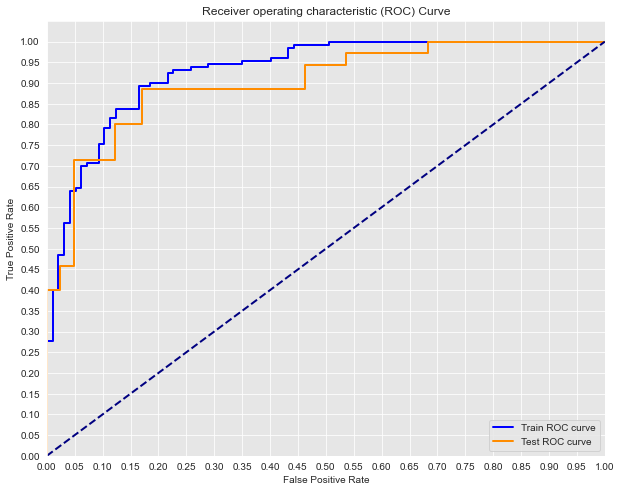

In [16]:
#ROC Curve
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [17]:
#Base Model with Intercept
logregi = LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear')
logregi.fit(X_train, y_train)

LogisticRegression(C=1e+16, solver='liblinear')

In [18]:
#Generating Predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

Custom Model Test AUC: 0.8331010452961672
Custome Model Train AUC: 0.8519825535289453
Scikit-learn Model 1 Test AUC: 0.8996515679442508
Scikit-learn Model 1 Train AUC: 0.9291038858049168
Scikit-learn Model 2 with intercept Test AUC: 0.8989547038327527
Scikit-learn Model 2 with intercept Train AUC: 0.9325931800158604


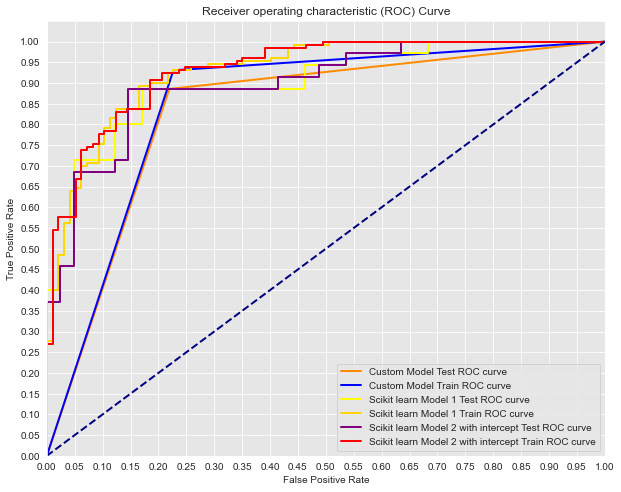

In [19]:
#Plotting all three models ROC curves on the same graph.

# Initial model plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)


print('Custom Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Custome Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Custom Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Custom Model Train ROC curve')


# Second model plots
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Scikit learn Model 1 Test ROC curve')
plt.plot(train_fpr, train_tpr, color='gold',
         lw=lw, label='Scikit learn Model 1 Train ROC curve')


# Third model plots
y_test_score = logregi.decision_function(X_test)
y_train_score = logregi.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label='Scikit learn Model 2 with intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label='Scikit learn Model 2 with intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Now, experiment with altering the regularization parameter. At a minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the training and test set for that specific model.

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and training AUC as you go along.

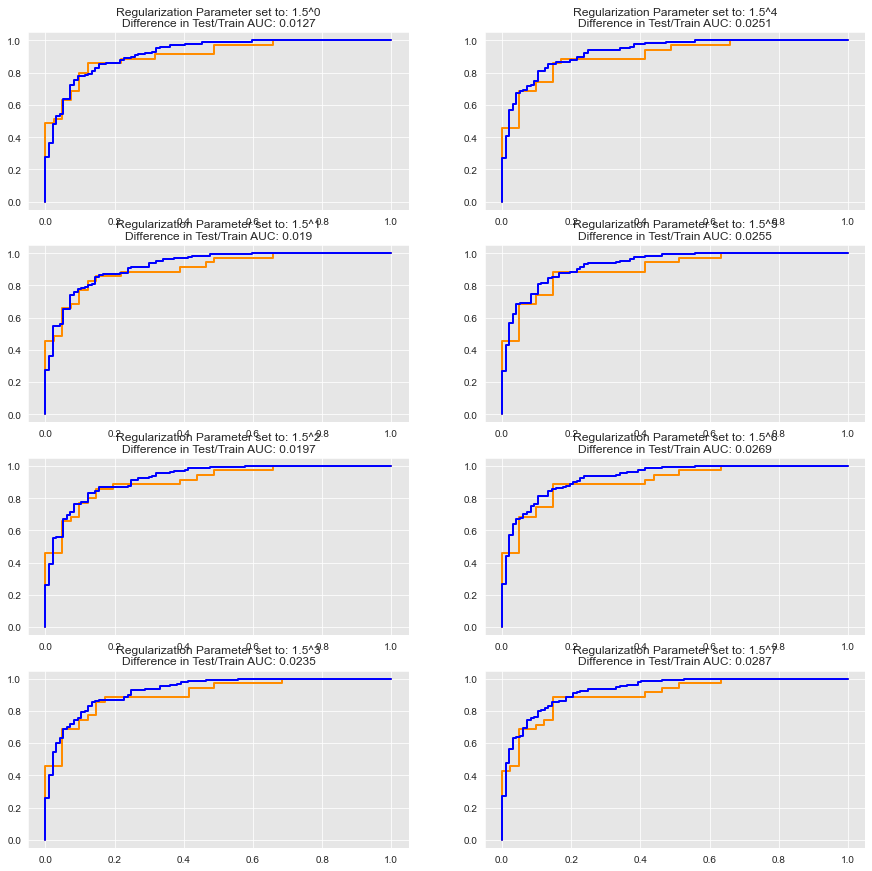

In [20]:
#Altering Regularization Parameter
fig, axes = plt.subplots(4,2, figsize=(15, 15))
for n in range(8):
    i = n%4
    j = n//4
    ax = axes[i, j]
    # Fit a model
    logreg = LogisticRegression(fit_intercept=True, C=1.5**(n), solver='liblinear')
    logreg.fit(X_train, y_train)
    
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    
    test_auc = auc(test_fpr, test_tpr)
    train_auc = auc(train_fpr, train_tpr)
    auc_diff = round(train_auc - test_auc, 4)

#     print('Test AUC with C=1.5^{}: {}'.format(n*2, auc(test_fpr, test_tpr)))
#     print('Train AUCwith C=1.5^{}: {}'.format(n*2, auc(train_fpr, train_tpr)))
    # Add the plot
    ax.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
    ax.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    
    ax.set_title('Regularization Parameter set to: 1.5^{}\nDifference in Test/Train AUC: {}'.format(n, auc_diff))
